# Telecom Churn Prediction | Feature Engineering

## Import Relevant Libraries

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

## Load data

In [94]:
raw_data = pd.read_csv("../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [95]:
df = raw_data.copy()

In [96]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Drop Unnecessary Features 

In [97]:
df = df.drop('customerID', axis=1)

## Handling invalid data types and missing values

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [99]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [100]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [101]:
df[df['TotalCharges'].isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [102]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)

The EDA proves there are no outliers

## Feature Selection 

In [103]:
df.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

### Service Density

In [104]:
service_cols = [
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies'
]

In [105]:
for col in service_cols:
    print(df[col].unique())

['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']


In [106]:
valid_services = ['Yes', 'Fiber optic', 'DSL']

df["service_count"] = df[service_cols].apply(
    lambda row: sum(val in valid_services for val in row),
    axis=1
)

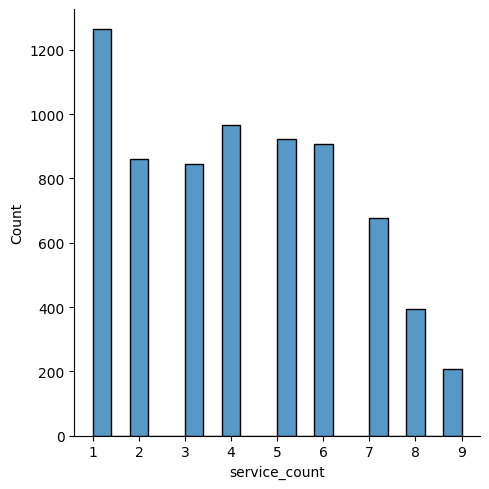

In [107]:
sns.displot(df['service_count'], kde=False)

In [108]:
df['service_count'].value_counts()

service_count
1    1264
4     965
5     922
6     908
2     859
3     846
7     676
8     395
9     208
Name: count, dtype: int64

### Tenure x MonthlyCharges

In [109]:
df["tenure_x_monthly"] = df["tenure"] * df["MonthlyCharges"]

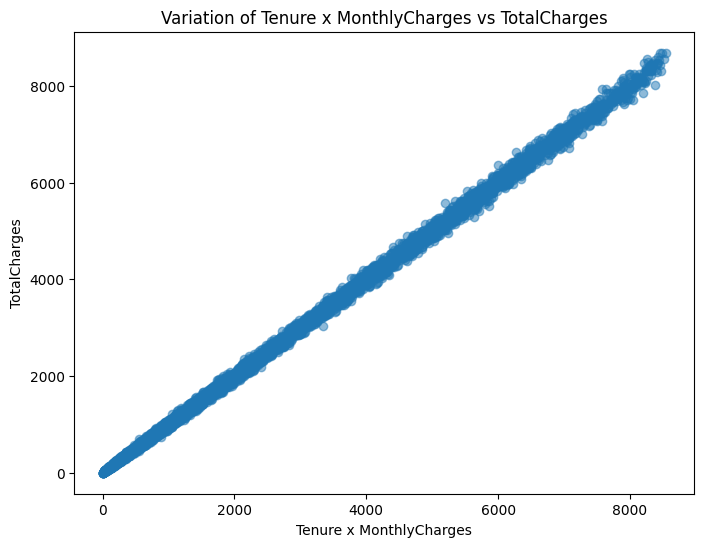

In [110]:
plt.figure(figsize=(8,6))
plt.scatter(df["tenure_x_monthly"], df["TotalCharges"], alpha=0.5)
plt.xlabel("Tenure x MonthlyCharges")
plt.ylabel("TotalCharges")
plt.title("Variation of Tenure x MonthlyCharges vs TotalCharges")
plt.show()

Since tenure x monthly charges is almost parallel to the TotalCharges we remove the new feature, as it will increase multicollinearity 

In [111]:
df = df.drop(columns=['tenure_x_monthly'])

In [112]:
df.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'service_count'], dtype=object)

### Customer Loyality

This feature attempts to capture customer loyalty based on tenure and monthly charges.
Tenure is rewarded progressively using a Fibonacci-based bonus to reflect increasing loyalty with each year, while monthly charges scale the value of that loyalty.

In [113]:
def fibonacci(n):
    a, b = 0, 1
    for _ in range(n):
        a, b = b, a + b
    return a

In [114]:
df['tenure_years'] = (df['tenure'] / 12).round().astype(int)
df['tenure_loyalty_bonus'] = df['tenure_years'].apply(lambda x: min(fibonacci(x), 21))
df['loyalty_score'] = df['tenure_loyalty_bonus'] * df['MonthlyCharges']

<Axes: xlabel='loyalty_score', ylabel='Count'>

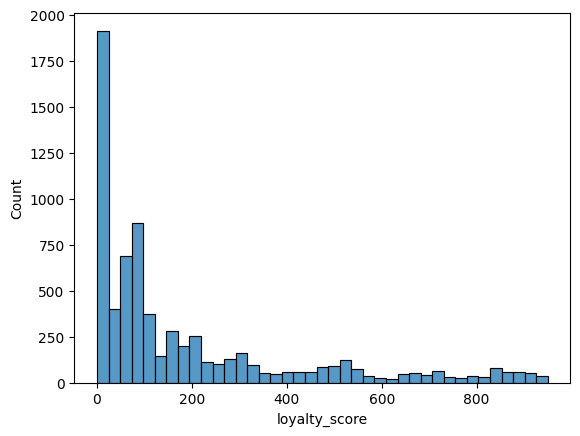

In [115]:
sns.histplot(df['loyalty_score'])

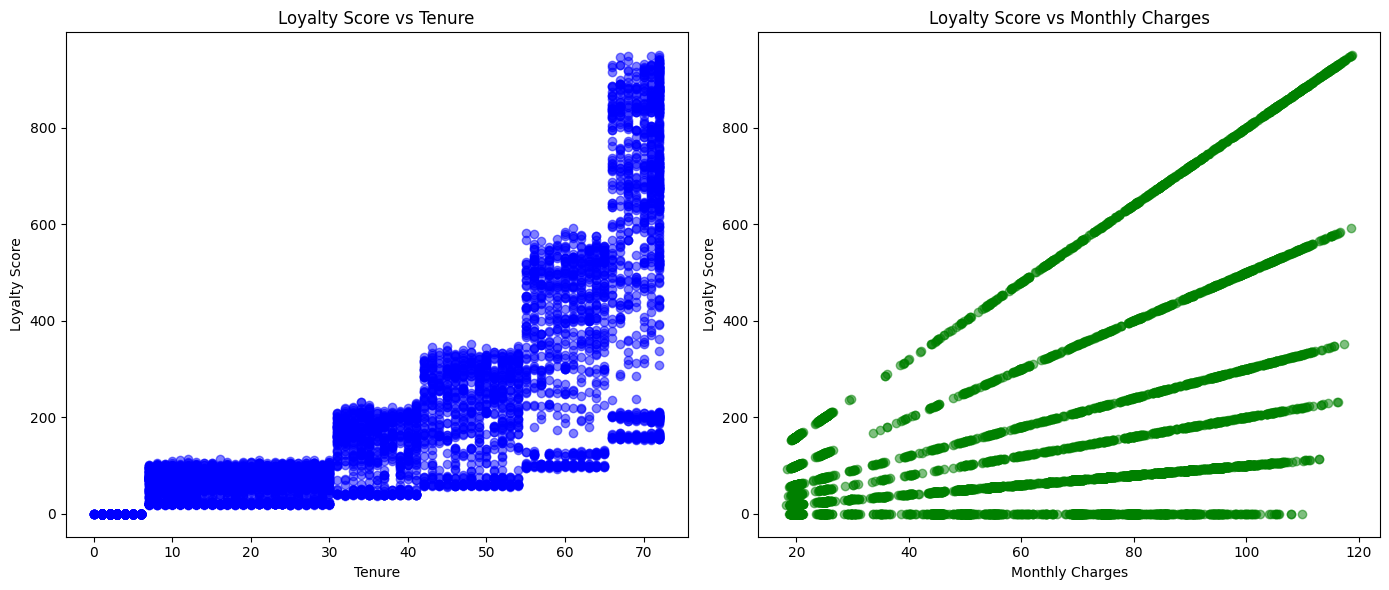

In [116]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))

axes[0].scatter(df['tenure'], df['loyalty_score'], alpha=0.5, color='blue')
axes[0].set_xlabel('Tenure')
axes[0].set_ylabel('Loyalty Score')
axes[0].set_title('Loyalty Score vs Tenure')

axes[1].scatter(df['MonthlyCharges'], df['loyalty_score'], alpha=0.5, color='green')
axes[1].set_xlabel('Monthly Charges')
axes[1].set_ylabel('Loyalty Score')
axes[1].set_title('Loyalty Score vs Monthly Charges')

plt.tight_layout()
plt.show()

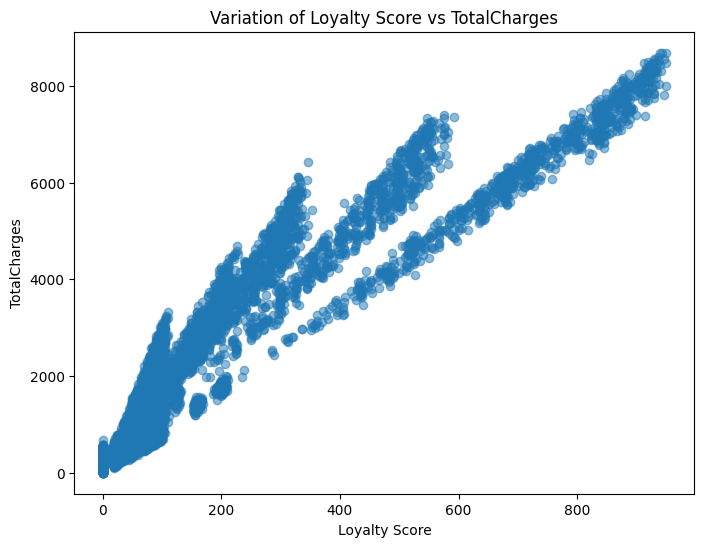

In [117]:
plt.figure(figsize=(8,6))
plt.scatter(df["loyalty_score"], df["TotalCharges"], alpha=0.5)
plt.xlabel("Loyalty Score")
plt.ylabel("TotalCharges")
plt.title("Variation of Loyalty Score vs TotalCharges")
plt.show()

In [118]:
df.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'service_count', 'tenure_years',
       'tenure_loyalty_bonus', 'loyalty_score'], dtype=object)

In [119]:
df = df.drop(columns = ['tenure_years', 'tenure_loyalty_bonus'])

## Extracting Categorical and Numeric Columns

In [120]:
df.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'service_count', 'loyalty_score'],
      dtype=object)

In [121]:
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn']

In [122]:
for col in categorical_cols:
    df[col] = df[col].astype('category')

In [123]:
df.dtypes

gender              category
SeniorCitizen       category
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
service_count          int64
loyalty_score        float64
dtype: object

In [124]:
numerical_cols = [col for col in df.columns if col not in categorical_cols]
numerical_cols

['tenure', 'MonthlyCharges', 'TotalCharges', 'service_count', 'loyalty_score']

## Encoding Categorical Features

In [125]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)

In [126]:
df_encoded.head()

,tenure,MonthlyCharges,TotalCharges,service_count,loyalty_score,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,1,29.85,29.85,2,0.0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
1,34,56.95,1889.50,4,113.9,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,2,53.85,108.15,4,0.0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,1
3,45,42.30,1840.75,4,126.9,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2,70.70,151.65,2,0.0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1


In [127]:
df_encoded.columns.values

array(['tenure', 'MonthlyCharges', 'TotalCharges', 'service_count',
       'loyalty_score', 'gender_Male', 'SeniorCitizen_1', 'Partner_Yes',
       'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'], dtype=object)

In [128]:
df_encoded.to_csv("../data/processed/telco_churn_encoded.csv", index=False)

## Scaling Numeric Features

In [129]:
df_encoded.describe(include='all')

,tenure,MonthlyCharges,TotalCharges,service_count,loyalty_score,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304,4.146244,187.733260,0.504756,0.162147,0.483033,0.299588,0.903166,...,0.384353,0.216669,0.387903,0.209144,0.240664,0.592219,0.216101,0.335794,0.228880,0.265370
std,24.559481,30.090047,2266.794470,2.312720,237.146015,0.500013,0.368612,0.499748,0.458110,0.295752,...,0.486477,0.412004,0.487307,0.406726,0.427517,0.491457,0.411613,0.472301,0.420141,0.441561
min,0.000000,18.250000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,35.500000,398.550000,2.000000,20.150000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,70.350000,1394.550000,4.000000,86.250000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,89.850000,3786.600000,6.000000,254.200000,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,72.000000,118.750000,8684.800000,9.000000,950.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [130]:
scaler = MinMaxScaler()

In [131]:
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

In [132]:
df_scaled = df_encoded.copy()

In [133]:
df_scaled.head()

,tenure,MonthlyCharges,TotalCharges,service_count,loyalty_score,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0.013889,0.115423,0.003437,0.125,0.000000,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0.472222,0.385075,0.217564,0.375,0.119895,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0.027778,0.354229,0.012453,0.375,0.000000,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,1
3,0.625000,0.239303,0.211951,0.375,0.133579,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0.027778,0.521891,0.017462,0.125,0.000000,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1


In [134]:
df_scaled.describe(include='all')

,tenure,MonthlyCharges,TotalCharges,service_count,loyalty_score,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.449599,0.462803,0.262497,0.393281,0.197614,0.504756,0.162147,0.483033,0.299588,0.903166,...,0.384353,0.216669,0.387903,0.209144,0.240664,0.592219,0.216101,0.335794,0.228880,0.265370
std,0.341104,0.299403,0.261007,0.289090,0.249627,0.500013,0.368612,0.499748,0.458110,0.295752,...,0.486477,0.412004,0.487307,0.406726,0.427517,0.491457,0.411613,0.472301,0.420141,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125000,0.171642,0.045891,0.125000,0.021211,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.402778,0.518408,0.160574,0.375000,0.090789,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.763889,0.712438,0.436003,0.625000,0.267579,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


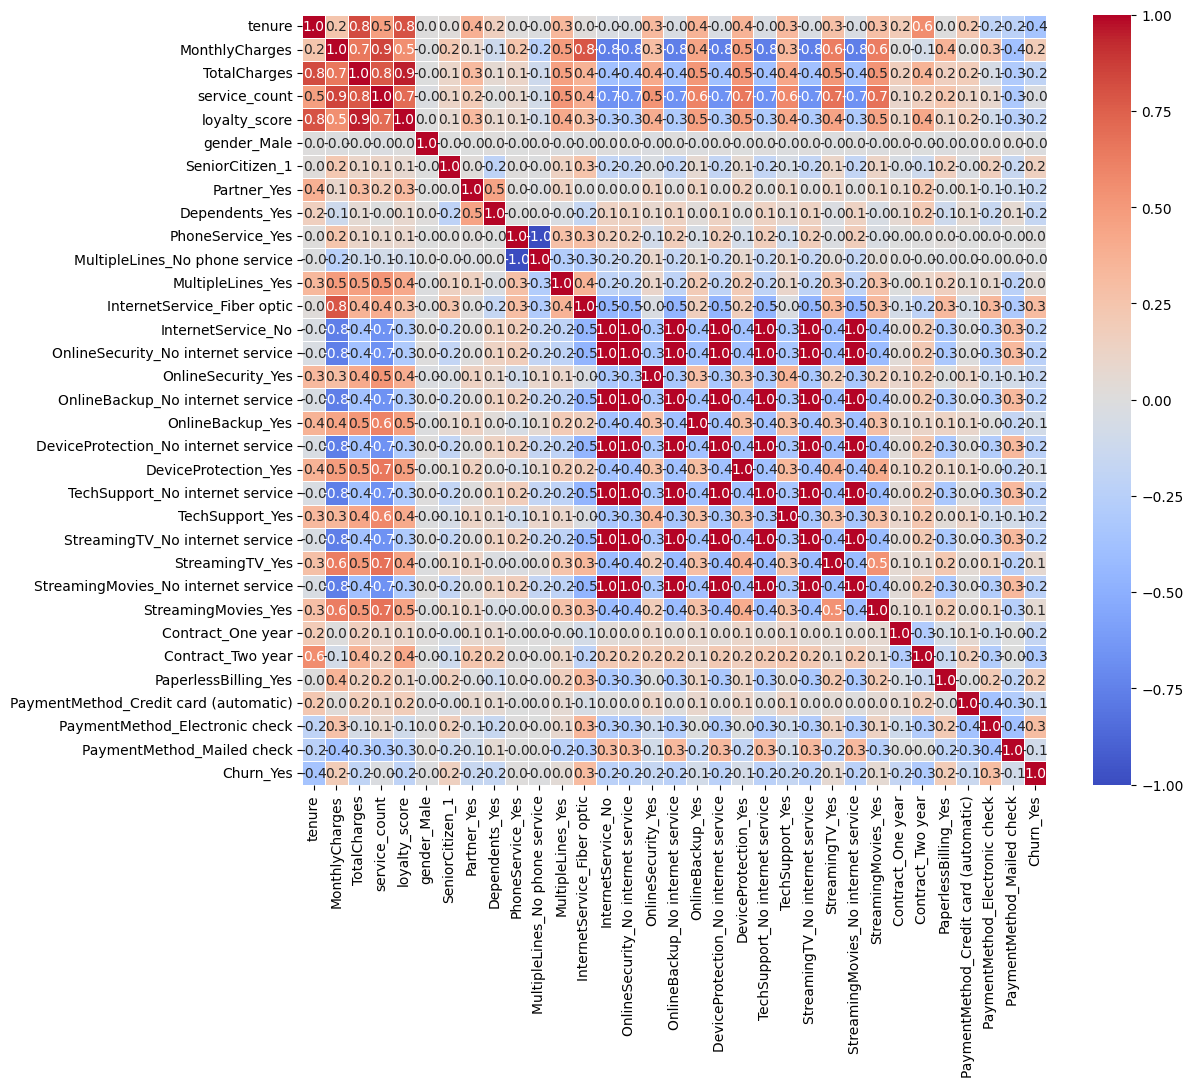

In [135]:
corr = df_scaled.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".1f", linewidths=.5)
plt.show()

In [136]:
df_scaled.head()

,tenure,MonthlyCharges,TotalCharges,service_count,loyalty_score,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0.013889,0.115423,0.003437,0.125,0.000000,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0.472222,0.385075,0.217564,0.375,0.119895,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0.027778,0.354229,0.012453,0.375,0.000000,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,1
3,0.625000,0.239303,0.211951,0.375,0.133579,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0.027778,0.521891,0.017462,0.125,0.000000,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1


## Hanlde Class Imbalance

In [137]:
df_scaled['Churn_Yes'].value_counts()

Churn_Yes
0    5174
1    1869
Name: count, dtype: int64

The class imbalance will be handled in the model using `class_weight='balanced'`. For the preprocessing, the class imbalance will not be addressed 

## Saving the Preprocessed Data

In [138]:
df_scaled.to_csv('../data/processed/preprocessed_telco.csv', index=False)